In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
df=pd.read_csv("D:\\relity_data\\archive\\WineQT.csv")
data=np.array(df.iloc[:,:2])#chỉ sử dụng 2 cột đầu của file csv
print(data)

[[7.4   0.7  ]
 [7.8   0.88 ]
 [7.8   0.76 ]
 ...
 [6.2   0.6  ]
 [5.9   0.55 ]
 [5.9   0.645]]


In [46]:
mean=np.mean(data,axis=0)
data_mean=data-mean
print(mean)
print(np.shape(data_mean))

[8.31111111 0.53133858]
(1143, 2)


In [10]:
cov=np.cov(data_mean.T)
print(cov)

[[ 3.05408834 -0.07871016]
 [-0.07871016  0.03226808]]


In [26]:
eigen_value, eigen_vector = np.linalg.eigh(cov)
print(eigen_value, len(eigen_vector))

[0.03021929 3.05613714] 2


In [50]:
n_selectDim = 1
sorted_index = np.argsort(eigen_value) # 4 3 2 1 0
selected_eigenvectors = eigen_vector.T[sorted_index[:n_selectDim]]
print(selected_eigenvectors)

[[-0.0260208 -0.9996614]]


In [52]:
X_mean_projected = np.dot(selected_eigenvectors, data_mean.T)
print("The data after projected onto eigen vectors : Dimensionality reduction")
print(X_mean_projected)

The data after projected onto eigen vectors : Dimensionality reduction
[[-0.14489646 -0.33524384 -0.21528447 ... -0.01370536  0.04408395
  -0.05088388]]


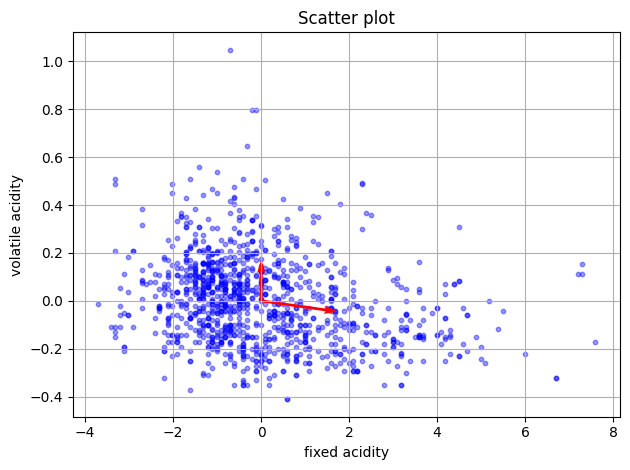

In [56]:
# Vẽ scatter plot
# Thêm dòng này để chuẩn hóa chiều vector hướng ra đúng chiều dữ liệu
eigen_value, eigen_vector = np.linalg.eig(cov)

plt.scatter(data_mean[:,0],data_mean[:,1], alpha=0.4, s=10, color='blue')
#Vẽ vector riêng, giá trị riêng:
for i in sorted_index:  # có 2 vector riêng vì dữ liệu có 2 chiều
    vec = eigen_vector[:, i]  # mỗi vector riêng
    val = eigen_value[i]      # giá trị riêng tương ứng

    scaled_vec = vec * np.sqrt(val)
    
    plt.quiver(
        0, 0,
        scaled_vec[0], scaled_vec[1],
        angles='xy', scale_units='xy', scale=1,
        color='red', width=0.005,
        label=f"PC{i+1}",
    )
plt.title("Scatter plot")
plt.xlabel("fixed acidity")
plt.ylabel("volatile acidity")
plt.grid(True)
plt.tight_layout()
plt.show()

    